In [1]:
from netCDF4 import Dataset
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys 
import os
sys.path.append(os.path.abspath("../../analysis_scripts/"))
import ncmc_analysis_tools as tools

In [3]:
n1_folders = glob('../tip3p/npert_*')
n1 = tools.AutoAnalyzeNCMCOptimization(n1_folders, nprop=1)

n5_folders = glob('../npert_nprop/nprop5/npert_*')
n5 = tools.AutoAnalyzeNCMCOptimization(n5_folders, nprop=5)

n10_folders = glob('../npert_nprop/nprop10/npert_*')
n10 = tools.AutoAnalyzeNCMCOptimization(n10_folders, nprop=10)

n20_folders = glob('../npert_nprop/nprop20/npert_*')
n20 = tools.AutoAnalyzeNCMCOptimization(n20_folders, nprop=20)

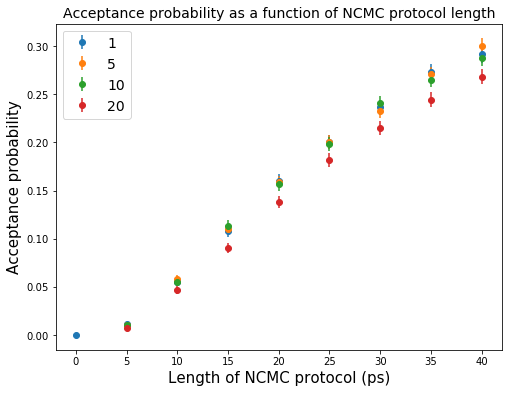

In [4]:
plt.figure(figsize=[8,6])
plt.errorbar(n1.protocol_length, n1.accept, yerr=n1.accept_error*2, fmt='o', label='1')
plt.errorbar(n5.protocol_length, n5.accept, yerr=n5.accept_error*2, fmt='o', label='5')
plt.errorbar(n10.protocol_length, n10.accept, yerr=n10.accept_error*2, fmt='o', label='10')
plt.errorbar(n20.protocol_length, n20.accept, yerr=n20.accept_error*2, fmt='o', label='20')
#plt.ylim((0 - graph_nudge, np.max(t3p_efficieny) + graph_nudge))
plt.xlabel('Length of NCMC protocol (ps)', fontsize=15)
plt.ylabel('Acceptance probability', fontsize=15)
plt.title('Acceptance probability as a function of NCMC protocol length', fontsize=14)
plt.legend(fontsize=14)
plt.show()

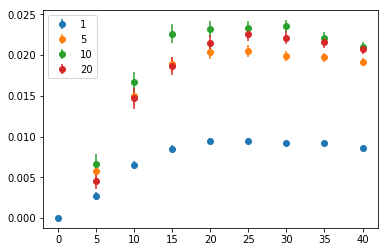

In [5]:
names = ['1', '5', '10', '20']
nprops = [n1, n5, n10, n20]

for n,l in zip(nprops, names):
    efficieny, error = n.calc_efficiency(mode='acceptance')
    plt.errorbar(n.protocol_length, efficieny, yerr=error*2, fmt='o', label=l)
plt.legend()


In [7]:
# Calculate efficiency
eff = []
err = []
for n in nprops:
    efficieny, error = n.calc_efficiency(mode='acceptance')
    eff.append(efficieny)
    err.append(error)
max_eff = np.max(np.hstack([*eff]))

In [9]:
nprops = [n1, n5, n10, n20]
nsteps = [1, 5, 10, 20]
for p, s in zip(nprops,nsteps):
    print('Average wallclock time for {0} propagations steps'.format(s), p.wallclock_time(10000)/s)

Average wallclock time for 1 propagations steps 16.9958399314
Average wallclock time for 5 propagations steps 7.86883165269
Average wallclock time for 10 propagations steps 6.92636632948
Average wallclock time for 20 propagations steps 6.4841371681


For 1 propagation step the splitting is VRRRRORRRRV.